In [138]:
from cil.io import NEXUSDataReader
from cil.utilities.jupyter import islicer, link_islicer

reco_spdhg = [ NEXUSDataReader(file_name="alpha_0.02_epoch_49.nxs").read() , 
               NEXUSDataReader(file_name="alpha_0.008_epoch_49.nxs").read(),
             NEXUSDataReader(file_name="alpha_0.003_epoch_72.nxs").read(),
             NEXUSDataReader(file_name="alpha_0.001_epoch_49.nxs").read()]
reco_fdk = NEXUSDataReader(file_name="FDK.nxs").read()

# sl1 = islicer(reco_fdk, direction='vertical')
# sl2 = islicer(reco_spdhg, direction='vertical')
# link_islicer(sl1,sl2)

In [145]:
reco_spdhg[::-1]

In [146]:
reco_spdhg

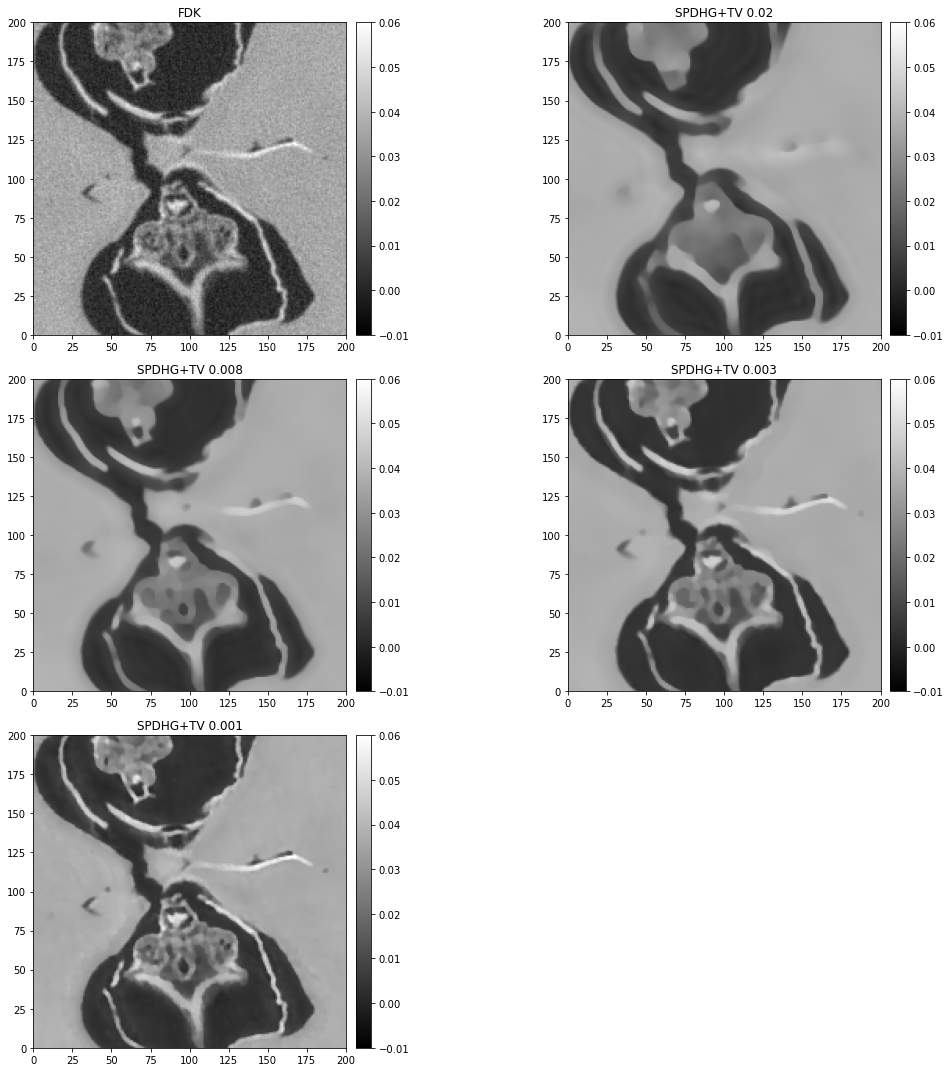

In [147]:
from cil.utilities.display import show2D
show2D([el.get_slice(vertical='centre').as_array()[130*2:230*2,130*2:230*2] \
        for el in \
        [reco_fdk, *reco_spdhg]\
       ], title=['FDK','SPDHG+TV 0.02','SPDHG+TV 0.008','SPDHG+TV 0.003','SPDHG+TV 0.001'],
       fix_range=(-0.01, 0.06))

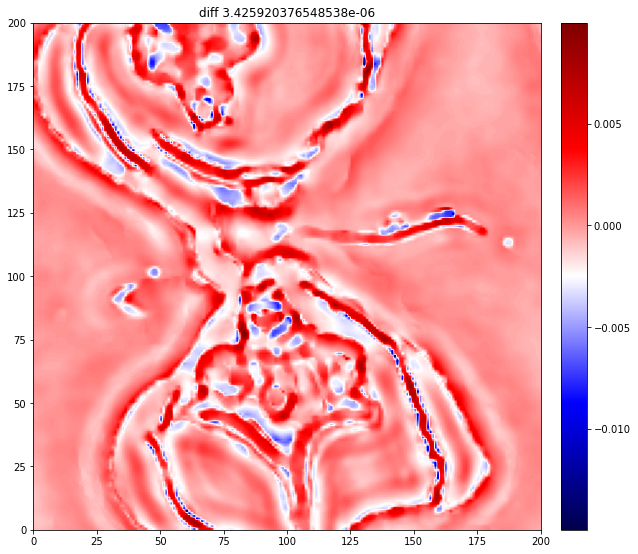

In [29]:
from cil.optimisation.functions import L2NormSquared
import functools

diff = L2NormSquared(b=reco_spdhg[-2])

num_voxels = functools.reduce(lambda x,y: x*y, reco_spdhg[-1].shape, 1)

show2D([el.get_slice(vertical='centre').as_array()[130*2:230*2,130*2:230*2] \
        for el in \
        [reco_spdhg[-1] - reco_spdhg[-2]]\
       ], title=['diff {}'.format(diff(reco_spdhg[-1])/num_voxels)],
       cmap='seismic')

In [148]:
import glob, re
alpha = 0.001
p = re.compile('alpha_{}_epoch_([0-9]*).nxs'.format(alpha))
slist = []
flist = []
for el in glob.glob('alpha_{}_epoch_*.nxs'.format(alpha)):
    slist.append(int(re.search('alpha_{}_epoch_([0-9]*).nxs'.format(alpha),el).group(1)))
    flist.append(el)
order = [ el for el in range(len(slist))]
list_3 = [el for el in zip(slist, order)]
list_3.sort()
# print (list_3)
# this contains the indices of the sorted list
arg_sort = [ el for el in zip(*list_3) ][1]

amount_update = []
img = [None, None]
for i,el in enumerate(flist):
    if i == 0:
        continue
    # I should be able to load 1 image only per iteration, not 2
    print("progress {}/{} {} {}".format(i, len(flist),flist[arg_sort[i-1]],flist[arg_sort[i]] ))
    s1 = NEXUSDataReader(file_name=flist[arg_sort[i-1]]).read()
    s2 = NEXUSDataReader(file_name=flist[arg_sort[i]]).read()
    diff = L2NormSquared(b=s1)
    amount_update.append(
        diff(s2)
    )

    


progress 1/70 alpha_0.001_epoch_0.nxs alpha_0.001_epoch_1.nxs
progress 2/70 alpha_0.001_epoch_1.nxs alpha_0.001_epoch_2.nxs
progress 3/70 alpha_0.001_epoch_2.nxs alpha_0.001_epoch_3.nxs
progress 4/70 alpha_0.001_epoch_3.nxs alpha_0.001_epoch_4.nxs
progress 5/70 alpha_0.001_epoch_4.nxs alpha_0.001_epoch_5.nxs
progress 6/70 alpha_0.001_epoch_5.nxs alpha_0.001_epoch_6.nxs
progress 7/70 alpha_0.001_epoch_6.nxs alpha_0.001_epoch_7.nxs
progress 8/70 alpha_0.001_epoch_7.nxs alpha_0.001_epoch_8.nxs
progress 9/70 alpha_0.001_epoch_8.nxs alpha_0.001_epoch_9.nxs
progress 10/70 alpha_0.001_epoch_9.nxs alpha_0.001_epoch_10.nxs
progress 11/70 alpha_0.001_epoch_10.nxs alpha_0.001_epoch_11.nxs
progress 12/70 alpha_0.001_epoch_11.nxs alpha_0.001_epoch_12.nxs
progress 13/70 alpha_0.001_epoch_12.nxs alpha_0.001_epoch_13.nxs
progress 14/70 alpha_0.001_epoch_13.nxs alpha_0.001_epoch_14.nxs
progress 15/70 alpha_0.001_epoch_14.nxs alpha_0.001_epoch_15.nxs
progress 16/70 alpha_0.001_epoch_15.nxs alpha_0.001_e

In [67]:
print (amount_update)

[17499.68, 9264.539, 5812.759, 3775.4414, 2287.9075, 1500.3323, 1071.666, 824.8456, 643.3781, 537.3549, 468.68793, 401.85114, 355.32437, 331.89728, 304.03113, 258.30875, 235.77866, 199.13269, 177.02289, 157.64981, 136.70724, 116.67056, 102.355286, 95.261505, 83.826996, 76.34912, 72.02062, 66.31818, 60.62909, 58.53581, 51.685944, 48.30796, 43.956146, 39.206207, 34.876945, 31.297565, 29.014849, 26.223923, 23.532753, 22.14422, 18.78615, 19.413853, 17.00624, 15.887656, 14.108345, 15.767941, 12.866079, 12.001278, 11.796296, 11.491214, 10.319682, 8.497349, 7.7755747, 7.563616, 6.5354333, 5.769379, 5.4646616, 4.8416967, 4.5177913, 4.3412647, 4.1474247, 3.8662302, 3.6306129, 3.4005523, 3.1974468, 3.0571938, 2.858941, 3.0494726, 2.627534, 2.5280726, 2.4389875, 2.1526492, 2.0689082, 1.9037292, 1.7477896, 1.6181476, 1.5311563, 1.4299448, 1.3237195, 1.277256]


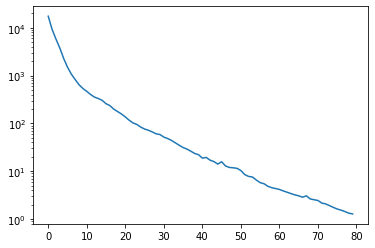

In [69]:
import matplotlib.pyplot as plt


plt.semilogy(amount_update)
plt.show()

progress 0/80 alpha_0.003_epoch_40.nxs alpha_0.003_epoch_56.nxs
progress 1/80 alpha_0.003_epoch_56.nxs alpha_0.003_epoch_55.nxs
progress 2/80 alpha_0.003_epoch_55.nxs alpha_0.003_epoch_38.nxs
progress 3/80 alpha_0.003_epoch_38.nxs alpha_0.003_epoch_61.nxs
progress 4/80 alpha_0.003_epoch_61.nxs alpha_0.003_epoch_71.nxs
progress 5/80 alpha_0.003_epoch_71.nxs alpha_0.003_epoch_36.nxs
progress 6/80 alpha_0.003_epoch_36.nxs alpha_0.003_epoch_31.nxs
progress 7/80 alpha_0.003_epoch_31.nxs alpha_0.003_epoch_75.nxs
progress 8/80 alpha_0.003_epoch_75.nxs alpha_0.003_epoch_12.nxs
progress 9/80 alpha_0.003_epoch_12.nxs alpha_0.003_epoch_63.nxs
progress 10/80 alpha_0.003_epoch_63.nxs alpha_0.003_epoch_35.nxs
progress 11/80 alpha_0.003_epoch_35.nxs alpha_0.003_epoch_77.nxs
progress 12/80 alpha_0.003_epoch_77.nxs alpha_0.003_epoch_45.nxs
progress 13/80 alpha_0.003_epoch_45.nxs alpha_0.003_epoch_67.nxs
progress 14/80 alpha_0.003_epoch_67.nxs alpha_0.003_epoch_20.nxs
progress 15/80 alpha_0.003_epoch_20

In [149]:
log = []
with (open("full_volume_alpha_{}.log".format(alpha), "r")) as f:
    for line in f:
#         print ("line", line.split(" "))
        ll = line.split(" ")
        cleaned = []
        for el in ll:
            if el != '':
                try:
                    el = float(el)
                    cleaned.append(el)
                except:
                        pass
#         print (cleaned, len(cleaned))
        if len(cleaned) > 3:
            ep = int(cleaned[0])
            if ep % 20 == 0:
                # there are duplicates but who cares
                if len(log) == 0 or ep != log[-1][0]:
                    log.append([cleaned[0], cleaned[3], cleaned[4]])
    print (len(log), log)

71 [[0.0, 265048000.0, -0.0], [20.0, 19830900.0, -272203000.0], [40.0, 11449200.0, -110037000.0], [60.0, 7642770.0, -59012000.0], [80.0, 6423030.0, -43979500.0], [100.0, 5888820.0, -30921000.0], [120.0, 5434470.0, -23654900.0], [140.0, 5171930.0, -18399500.0], [160.0, 4985560.0, -14905400.0], [180.0, 4815750.0, -11110400.0], [200.0, 4694200.0, -9568490.0], [220.0, 4596050.0, -8519400.0], [240.0, 4517560.0, -8746290.0], [260.0, 4430470.0, -7053000.0], [280.0, 4344330.0, -7967730.0], [300.0, 4278940.0, -inf], [320.0, 4236590.0, -inf], [340.0, 4198810.0, -inf], [360.0, 4167260.0, -inf], [380.0, 4135250.0, -inf], [400.0, 4108180.0, -inf], [420.0, 4093620.0, -inf], [440.0, 4077150.0, -inf], [460.0, 4063050.0, -inf], [480.0, 4050780.0, -inf], [500.0, 4040160.0, -inf], [520.0, 4027680.0, -inf], [540.0, 4018610.0, -inf], [560.0, 4007800.0, -inf], [580.0, 3999740.0, -inf], [600.0, 3992720.0, -inf], [620.0, 3986580.0, -inf], [640.0, 3981350.0, -inf], [660.0, 3979970.0, -inf], [680.0, 3972250.0, 

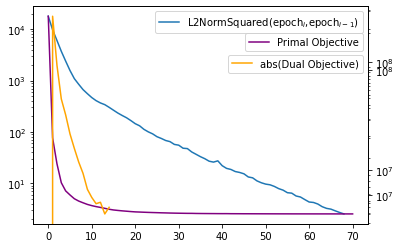

In [151]:
# plt.semilogy([el/20 for el in log], [el])
# plt.show()
convergence = [el for el in zip(*log)]

fig, ax = plt.subplots()
ax.semilogy([i for i in range(len(amount_update))], amount_update, 
            label = 'L2NormSquared(epoch$_i$,epoch$_{i-1}$)')
ax2 = ax.twinx()
ax2.semilogy([el/20 for el in convergence[0]], convergence[1], 
             color='purple', label = 'Primal Objective')
ax3 = ax.twinx()
ax3.semilogy([el/20 for el in convergence[0]], [abs(el) for el in convergence[2]], 
             color='orange', label='abs(Dual Objective)')
ax.legend(loc = 'upper right')
ax2.legend(loc = 'upper right',bbox_to_anchor=(1, 0.9))
ax3.legend(loc = 'upper right',bbox_to_anchor=(1, 0.8))
plt.show()
# plt.semilogy([el/20 for el in log], [el])
# plt.show()